In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [25]:
df = pd.read_csv("../dataset/HousingData.csv")

In [26]:
scaler = MinMaxScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menampilkan statistik ringkasan data setelah normalisasi
print("\nStatistik ringkasan setelah normalisasi:\n")
display(df_normalized.describe())


Statistik ringkasan setelah normalisasi:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.098013,0.233889,0.250583,0.255340,0.238431,0.134627,0.288357,0.191482,0.378576,0.321636,0.230313,0.230205,0.197458,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.131687,0.445392,0.435376,0.088259,0.130435,0.175573,0.510638,0.945730,0.148869,0.267222
50%,0.002781,0.000000,0.338343,0.000000,0.314815,0.507281,0.761071,0.188949,0.173913,0.272901,0.686170,0.986232,0.267660,0.360000
75%,0.039945,0.125000,0.646628,0.000000,0.491770,0.586798,0.937951,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
print(df_normalized.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [28]:
df_normalized['CRIM'] = df_normalized['CRIM'].fillna(df_normalized['CRIM'].mean())
df_normalized['ZN'] = df_normalized['ZN'].fillna(df_normalized['ZN'].mean())
df_normalized['INDUS'] = df_normalized['INDUS'].fillna(df_normalized['INDUS'].mean())
df_normalized['CHAS'] = df_normalized['CHAS'].fillna(df_normalized['CHAS'].mean())
df_normalized['AGE'] = df_normalized['AGE'].fillna(df_normalized['AGE'].mean())
df_normalized['LSTAT'] = df_normalized['LSTAT'].fillna(df_normalized['LSTAT'].mean())

In [29]:
print(df_normalized.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [30]:
df["class"] = df["MEDV"].map(lambda x: 1 if x > 30  else 0)
display(df)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [31]:
df['intercept'] = 1

# Memisahkan fitur (x) dan target (y)
# Memisahkan fitur (x, y) dan variabel target (label)
X = df[['intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['class']
# Mengganti nilai yang hilang dengan mean dari setiap kolom
X.fillna(X.mean(), inplace=True)

# Memeriksa apakah ada nilai tak terbatas (inf) dan menggantinya dengan NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)  # Menghapus baris yang mengandung NaN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_766/884610314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_766/884610314.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_766/884610314.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [50]:
model = sm.Logit(y_train, X_train)

In [51]:
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.144618
         Iterations 11


In [34]:
print(model_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  354
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                           13
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.6994
Time:                        10:30:28   Log-Likelihood:                -51.195
converged:                       True   LL-Null:                       -170.28
Covariance Type:            nonrobust   LLR p-value:                 1.819e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.8163      9.072     -0.972      0.331     -26.598       8.965
CRIM           0.0143      0.048      0.301      0.764      -0.079       0.107
ZN             0.0287      0.014      2.059      0.0

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


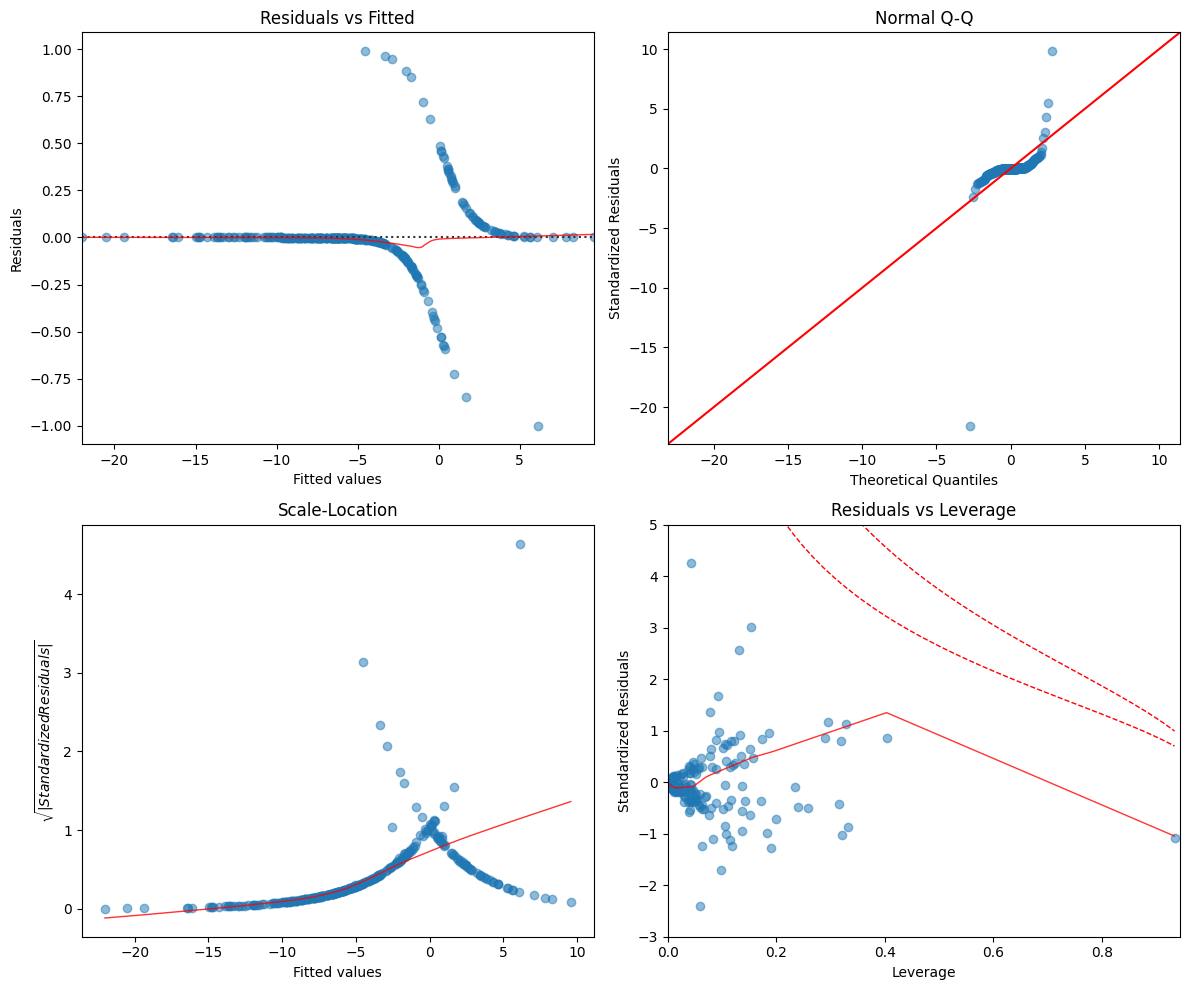

In [35]:
import sys
import os

# Menambahkan path ke folder yang berisi script2.py
sys.path.append(os.path.abspath('../my_package'))
from diagnosticPlotLogistic import logistic_diagnostic_plots
logistic_diagnostic_plots(X, y, model_fit)

In [36]:
predictions = model_fit.predict(X_train) > 0.3

conf_matrix = confusion_matrix(y_train, predictions)

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative (0)', 'Actual Positive (1)'], columns=['Predicted Negative (0)', 'Predicted Positive (1)'])
print("-"*70)
print("Confusion Matrix:")
print(conf_df)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung tingkat akurasi
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Mengubah ke persen
accuracy_percent = accuracy * 100
print('-'*70)
print(f"Tingkat Akurasi: {accuracy_percent:.4}%")

----------------------------------------------------------------------
Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     274                      14
Actual Positive (1)                       6                      60
----------------------------------------------------------------------
Tingkat Akurasi: 94.35%


In [37]:
predictions = model_fit.predict(X_test) > 0.3

conf_matrix = confusion_matrix(y_test, predictions)

conf_df = pd.DataFrame(conf_matrix, index=['Actual Negative (0)', 'Actual Positive (1)'], columns=['Predicted Negative (0)', 'Predicted Positive (1)'])
print("-"*70)
print("Confusion Matrix:")
print(conf_df)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung tingkat akurasi
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Mengubah ke persen
accuracy_percent = accuracy * 100
print('-'*70)
print(f"Tingkat Akurasi: {accuracy_percent:.4}%")

----------------------------------------------------------------------
Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     127                       7
Actual Positive (1)                       2                      16
----------------------------------------------------------------------
Tingkat Akurasi: 94.08%


In [38]:
predicted_probs = model_fit.predict(X_train)

# Menghitung deviance residual secara manual
residual_deviance = -2 * np.sum(y * np.log(predicted_probs) + (1 - y) * np.log(1 - predicted_probs))

print("Residual Deviance:", residual_deviance)

Residual Deviance: 102.38950216398061


In [39]:
# Mendapatkan nilai null deviance
null_deviance = 2 * model_fit.llnull
print("Null Deviance:", null_deviance)

Null Deviance: -340.5625519953743


In [40]:
# Mendapatkan nilai AIC
aic = model_fit.aic
print("AIC:", aic)

AIC: 130.38950216398072


In [41]:
scoring_method = model_fit.method
print("Scoring Method:", scoring_method)

Scoring Method: MLE


In [44]:
print(model_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  354
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                           13
Date:                Thu, 29 Feb 2024   Pseudo R-squ.:                  0.6994
Time:                        10:31:07   Log-Likelihood:                -51.195
converged:                       True   LL-Null:                       -170.28
Covariance Type:            nonrobust   LLR p-value:                 1.819e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.8163      9.072     -0.972      0.331     -26.598       8.965
CRIM           0.0143      0.048      0.301      0.764      -0.079       0.107
ZN             0.0287      0.014      2.059      0.0